In [ ]:
!pip install -U datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 16.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
  Attempting uninstall: datasets
    Found existing installation: datasets 2.14.4
    Uninstalling datasets-2.14.4:
      Successfully uninstalled datasets-2.14.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset
from collections import Counter
import re
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
dataset = load_dataset("udmurtNLP/udmurt-russian-parallel-corpora")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/13.1M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/101833 [00:00<?, ? examples/s]

In [ ]:
df = pd.DataFrame(dataset['train'])

In [ ]:
def count_words(text, lang='other'):
    #Количество слов
    #For agglutinative languages, we may need complex word segmenter based on morphological analysis.(?)
    return len(text.split())

def count_chars(text):
    #символы
    return len(text)

def count_tokens(text, tokenizer=None):
    #токен
    if tokenizer is None:
        return len(text.split())
    else:
        return len(tokenizer.tokenize(text))

In [ ]:
# 1. EDA
# инициализация по языкам
stats = {'udm': {'words': 0, 'chars': 0, 'tokens': 0, 'sent_lengths_words': [], 'sent_lengths_chars': [], 'sent_lengths_tokens': []},
      'ru': {'words': 0, 'chars': 0, 'tokens': 0, 'sent_lengths_words': [], 'sent_lengths_chars': [], 'sent_lengths_tokens': []}}

In [ ]:
tokenizer = nltk.tokenize.WhitespaceTokenizer()

In [ ]:
for index, row in df.iterrows():
    udm_text = row['udm']
    ru_text = row['ru']

    # udm
    udm_word_count = count_words(udm_text)
    udm_char_count = count_chars(udm_text)
    udm_token_count = count_tokens(udm_text, tokenizer)
    stats['udm']['words'] += udm_word_count
    stats['udm']['chars'] += udm_char_count
    stats['udm']['tokens'] += udm_token_count
    stats['udm']['sent_lengths_words'].append(udm_word_count)
    stats['udm']['sent_lengths_chars'].append(udm_char_count)
    stats['udm']['sent_lengths_tokens'].append(udm_token_count)

    # ru
    ru_word_count = count_words(ru_text)
    ru_char_count = count_chars(ru_text)
    ru_token_count = count_tokens(ru_text, tokenizer)
    stats['ru']['words'] += ru_word_count
    stats['ru']['chars'] += ru_char_count
    stats['ru']['tokens'] += ru_token_count
    stats['ru']['sent_lengths_words'].append(ru_word_count)
    stats['ru']['sent_lengths_chars'].append(ru_char_count)
    stats['ru']['sent_lengths_tokens'].append(ru_token_count)

# объём
for lang in ['udm', 'ru']:
    print(f"{lang.upper()}:")
    print(f"words:{stats[lang]['words']}")
    print(f"chars:{stats[lang]['chars']}")
    print(f"tokens:{stats[lang]['tokens']}")

UDM:
words:1043734
chars:6762043
tokens:1043734
RU:
words:1083595
chars:6623831
tokens:1083595


## Phase 3

In [ ]:
!pip install transformers sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 75.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 50.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 61.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
from sentence_transformers import SentenceTransformer
from scipy.spatial.distance import cosine
import torch
from tqdm import tqdm

In [ ]:
!apt-get install libhunspell-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libhunspell-dev is already the newest version (1.7.0-4build1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
!pip install hunspell

  Preparing metadata (setup.py) ... done
  Created wheel for hunspell: filename=hunspell-0.5.5-cp311-cp311-linux_x86_64.whl size=66315 sha256=216c26772dbb556da24df945996969cba9b899fb499acb015b33742817ee73f6
  Stored in directory: /root/.cache/pip/wheels/0b/41/b3/14ebfe8dfb3116e3f1ab55ff0db766d1ef033b6842ccc67e24
Successfully built hunspell


In [ ]:
import hunspell
hobj = hunspell.HunSpell('/content/udm.dic', '/content/udm.aff')

In [ ]:
hobj.spell('нярга')

True

In [ ]:
hobj.suggest('пӧсяткыны')

['пӧсятыны',
 'пӧсятскыны',
 'пӧсят кыны',
 'пӧсят-кыны',
 'пӧсятӥськыны',
 'пӧсятытыны',
 'пӧсятылыны',
 'пӧсятъяны']

In [ ]:
hobj.analyze('пӧсятскыны')

[b' st:\xd0\xbf\xd3\xa7\xd1\x81\xd1\x8f\xd1\x82\xd1\x81\xd0\xba\xd1\x8b\xd0\xbd\xd1\x8b',
 b' st:\xd0\xbf\xd3\xa7\xd1\x81\xd1\x8f\xd1\x82\xd1\x81\xd0\xba\xd1\x8b\xd0\xbd\xd1\x8b fl:V1']

In [ ]:
hobj.stem('пӧсятскыны')

[b'\xd0\xbf\xd3\xa7\xd1\x81\xd1\x8f\xd1\x82\xd1\x81\xd0\xba\xd1\x8b\xd0\xbd\xd1\x8b']

In [ ]:
hobj.add('привет')

0

In [ ]:
hobj.spell('привет')

False

In [ ]:
hobj.remove('привет')

0

In [ ]:
# 2. Проверка и исправление текста
def correct_text(text):
    words = text.split()
    corrected = []
    modified = False

    for word in words:
        # Удаление знаков пунктуации для проверки
        clean_word = word.strip('.,!?;:"\'()[]')

        if not hobj.spell(clean_word):
            suggestions = hobj.suggest(clean_word)
            if suggestions:
                # Выбираем первое предложение
                corrected_word = suggestions[0]
                corrected.append(corrected_word)
                modified = True
            else:
                corrected.append(word)
        else:
            corrected.append(word)

    return ' '.join(corrected), modified

# Применение функции ко всему датасету
correction_dict = {}
df['udm_corrected'] = ''
df['is_modified'] = False

for idx, row in tqdm(df.iterrows(), total=len(df)):
    corrected_text, modified = correct_text(row['udm'])
    df.at[idx, 'udm_corrected'] = corrected_text
    df.at[idx, 'is_modified'] = modified

    # Сбор статистики исправлений
    if modified:
        original_words = set(row['udm'].split())
        corrected_words = set(corrected_text.split())
        changed_words = original_words - corrected_words

        for word in changed_words:
            correction_dict[word] = correction_dict.get(word, 0) + 1

print(f"Исправлено предложений: {df['is_modified'].sum()}")

100%|██████████| 101833/101833 [48:52<00:00, 34.72it/s]

Исправлено предложений: 42844


In [ ]:
df.to_csv('is_modified.csv', index=False)

In [ ]:
df.head()

,ru,udm,udm_len,ru_len,udm_corrected,is_modified
0,"Каждый день над рабочей слободкой, в дымном, м...","Рабочийёслэн слободказы вадьсын, ӵыно, вӧё омы...",33,35,"Рабочийёслэн слободказы вадьсын, ӵыно, вӧё омы...",False
1,В холодном сумраке они шли по немощеной улице ...,Кезьыт ӵукна ӝомытын соос изэн вӧлдымтэ урам к...,27,26,Кезьыт ӵукна ӝомытын соос изэн вӧлдымтэ урам к...,False
2,Грязь чмокала под ногами.,Пыд улын дэри тяпкетылӥз.,4,4,Пыд улын дэри топкетылӥз,True
3,Раздавались хриплые восклицания сонных голосов...,Кылӥськылӥзы кӧлэм бере кежыр луэм куараос. Ур...,24,22,Кылӥськылӥзы кӧлэм бере кежыр луэм куараос. Ур...,True
4,"Угрюмо и строго маячили высокие черные трубы, ...",Слободка вадьсы зӧк бодыос выллем ӝутскем ӝужы...,13,13,Слободка вадьсы зӧк бодыос выллем ӝутскем ӝужы...,False


In [ ]:
import json
# 3. Словарь исправлений
# Сортировка по частоте исправлений
sorted_corrections = sorted(correction_dict.items(), key=lambda x: x[1], reverse=True)

print("Топ-20 исправленных слов:")
for word, count in sorted_corrections[:20]:
    print(f"{word}: {count} раз")

# Сохранение полного словаря
with open('udmurt_corrections.json', 'w') as f:
    json.dump(correction_dict, f, ensure_ascii=False)

Топ-20 исправленных слов:
—: 30040 раз
Валентинка: 191 раз
сион: 179 раз
уин: 168 раз
Енакиев: 165 раз
Карабас: 122 раз
ваиз: 107 раз
«Мон: 91 раз
§.: 91 раз
«Нош: 80 раз
ваиз.: 78 раз
Таиска: 77 раз
Барабас: 76 раз
―: 73 раз
«Ма: 70 раз
соэ: 67 раз
шуса: 67 раз
abu: 64 раз
«Мар: 62 раз
сярись: 59 раз


In [ ]:
df_cosine = pd.read_csv( '/content/distances.csv')
cosine_distance = df_cosine['cosine_distance']

In [ ]:
cosine_distance

,cosine_distance
0,0.241498
1,0.159824
2,0.346754
3,0.215402
4,0.238771
...,...
101828,0.141368
101829,0.247522
101830,0.191435
101831,0.164888


In [ ]:
# 4. Поиск семантически далёких предложений
# Используем ранее вычисленные расстояния
distant_pairs = df_cosine.nlargest(10, 'cosine_distance')

print("Топ-10 семантически далёких предложений:")
for idx, row in distant_pairs.iterrows():
    print(f"\nПара #{idx+1} | Расстояние: {row['cosine_distance']:.4f}")
    print(f"Удмуртский: {row['udm']}")
    print(f"Русский: {row['ru']}")
    print("-" * 80)

Топ-10 семантически далёких предложений:

Пара #27600 | Расстояние: 1.0386
Удмуртский: Верос
Русский: Ох и попало сегодня Настеньке!
--------------------------------------------------------------------------------

Пара #40341 | Расстояние: 1.0307
Удмуртский: Нош соосыз номыре валатэк сыло: малы серекъямзэс уг валало.
Русский: Дед Тарас и Павел, не понимая, стоят перед этой четверкой бешено хохочущих людей, словно старясь разгадать причину этого невероятного неожиданного смеха.
--------------------------------------------------------------------------------

Пара #27693 | Расстояние: 1.0106
Удмуртский: Вылысьтыд та д?сед п?сьтыса бырытозь, писпу йылэ туб.
Русский: Как все получишь, на дерево полезай и до тех пор лезь, пока все семь пар бочкоров и одежды семь смен не истреплешь вконец, покуда они сами с тебя не свалятся.
--------------------------------------------------------------------------------

Пара #19620 | Расстояние: 1.0103
Удмуртский: Озьыен, эшъёс, мынам т?ледлы вераме потэ:

In [ ]:
# 5. Поиск выбросов по разнице длин предложений
# Рассчитываем разницу длин
df['len_diff'] = abs(df['udm_len'] - df['ru_len'])

diff_mean = df['len_diff'].mean()
# Определение выбросов с помощью z-score
z_scores = (df['len_diff'] - diff_mean) / diff_std
df['z_score'] = z_scores

# Порог для выбросов (z-score > 3 соответствует 99.7% данных)
outlier_threshold = 3
diff_outliers = df[abs(z_scores) > outlier_threshold]

# Альтернативный метод: IQR
Q1 = df['len_diff'].quantile(0.25)
Q3 = df['len_diff'].quantile(0.75)
IQR = Q3 - Q1
iqr_outliers = df[(df['len_diff'] > Q3 + 1.5 * IQR)]

# Объединяем результаты
all_outliers = pd.concat([diff_outliers, iqr_outliers]).drop_duplicates()

# Сортировка по величине разницы
all_outliers = all_outliers.sort_values('len_diff', ascending=False)

# Вывод результатов
print(f"Найдено выбросов: {len(all_outliers)}")
print(f"Средняя разница длин: {diff_mean:.2f} токенов")
print(f"Максимальная разница длин: {all_outliers['len_diff'].max()} токенов")

# Вывод топ-10 примеров с наибольшей разницей
print("\nТоп-10 примеров с наибольшей разницей длин:")
for idx, row in all_outliers.head(10).iterrows():
    print(f"\nПример #{idx+1} | Разница: {row['len_diff']} токенов | Z-оценка: {row['z_score']:.2f}")
    print(f"Удмуртский ({row['udm_len']} токенов): {row['udm']}")
    print(f"Русский ({row['ru_len']} токенов): {row['ru']}")
    print("-" * 100)

Найдено выбросов: 3065
Средняя разница длин: 1.39 токенов
Максимальная разница длин: 75 токенов

Топ-10 примеров с наибольшей разницей длин:

Пример #99034 | Разница: 75 токенов | Z-оценка: 41.94
Удмуртский (122 токенов): Соин ик СССР-лэсь Наркомземзэ, СССР-лэсь технической культураосъя Наркоматсэ, СССР-лэсь совхозъёсъя Наркоматсэ, СССР-лэсь Наркомпищепромзэ, СССР-лэсь Наркоммясомолпромзэ, партилэсь обкомъёссэ но крайкомъёссэ, союзной республикаосысь компартиослэсь ЦК-оссэс, облисполкомъёсты, крайисполкомъёсты но республикаослэсь совнаркомъёссэс косо колхозъёсты, МТС-ёсты но совхозъёсты азьланьын организационно-хозяйственной ласянь юнматыны, соослэсь ваньзэ тракторъёссэс, комбайнъёссэс но мукет сельскохозяйственной машинаоссэс, ужась пудозэс но валэн ужан инвентарьзэс ваньзэ уже кутыны но колхозъёсын, МТС-ёсын но совхозъёсын ужан дисциплинаез ялан юнматыса но ужез радъянэз умоятыса, азьланьын ужазинлыкез данаклы будэтыны. СССР-лэн Народной Комиссаръёсызлэн Советсы но ВКП(б)-лэн Централ

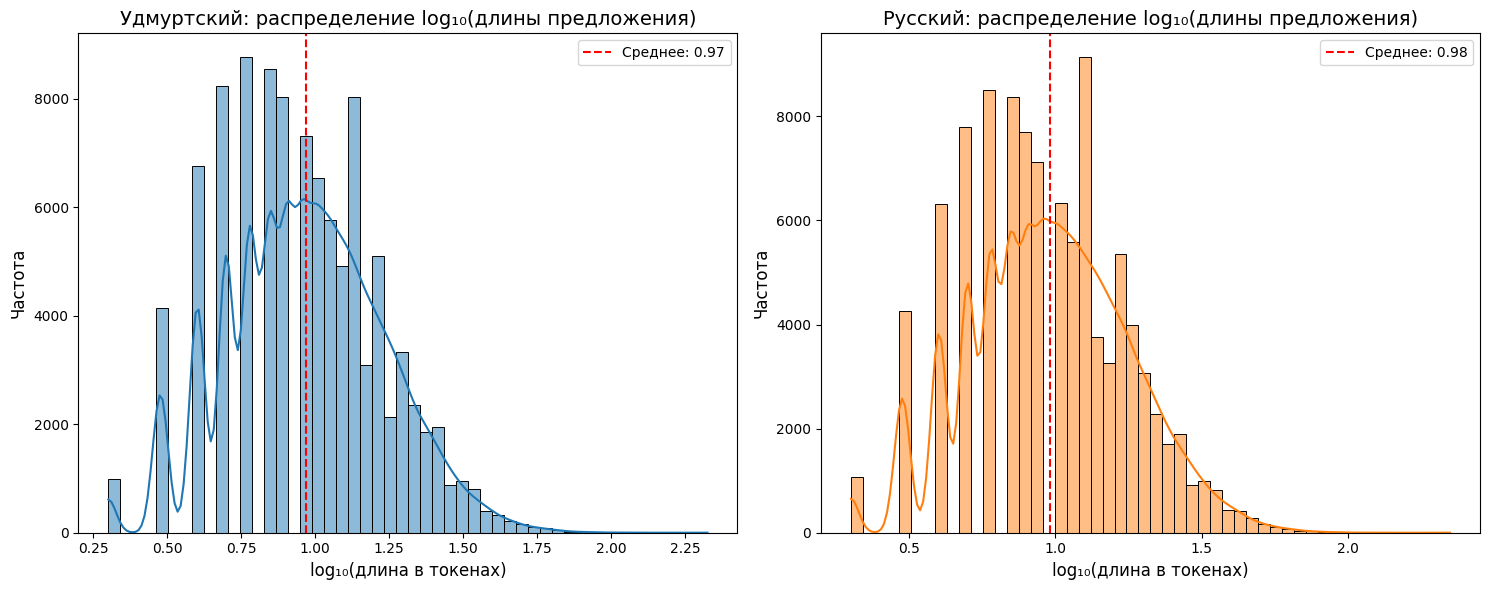

In [ ]:
# 6. Эксперименты с основаниями логарифмов
bases = [10]  # Попробуем разные основания

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# График для удмуртского языка
sns.histplot(df['udm_log10'], bins=50, kde=True, ax=axes[0], color='#1f77b4')
axes[0].set_title('Удмуртский: распределение log₁₀(длины предложения)', fontsize=14)
axes[0].set_xlabel('log₁₀(длина в токенах)', fontsize=12)
axes[0].set_ylabel('Частота', fontsize=12)

# Добавляем вертикальные линии для статистик
udm_mean = df['udm_log10'].mean()
udm_median = df['udm_log10'].median()
axes[0].axvline(udm_mean, color='red', linestyle='--', label=f'Среднее: {udm_mean:.2f}')
axes[0].legend()

# График для русского языка
sns.histplot(df['ru_log10'], bins=50, kde=True, ax=axes[1], color='#ff7f0e')
axes[1].set_title('Русский: распределение log₁₀(длины предложения)', fontsize=14)
axes[1].set_xlabel('log₁₀(длина в токенах)', fontsize=12)
axes[1].set_ylabel('Частота', fontsize=12)

# Добавляем вертикальные линии для статистик
ru_mean = df['ru_log10'].mean()
ru_median = df['ru_log10'].median()
axes[1].axvline(ru_mean, color='red', linestyle='--', label=f'Среднее: {ru_mean:.2f}')
axes[1].legend()

# Оптимизация внешнего вида
plt.tight_layout()
plt.savefig('log10_length_distribution.png', dpi=300)
plt.show()

Очень похожие модели распределения:

Кривые распределения двух языков почти перекрываются (пики частот находятся в диапазоне 6000-8000)
Это показывает, что длина параллельных пар предложений в высокой степени совпадает, что указывает на хорошее качество перевода корпуса

Мы также видим небольшую разницу в среднее, это значит русские предложения немного длиннее.